<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250612_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GridSearch

GridSearch（網格搜索）是一種超參數調優的方法，用於選擇機器學習模型的最佳超參數配置。它的基本原理是：針對給定的超參數範圍，系統地進行所有可能的超參數組合的搜索，並通過交叉驗證或其他評估方式來選擇最佳的參數組合。

## 基本概念：
- **超參數（Hyperparameters）**：是模型訓練過程中的設置，這些參數通常由使用者手動設定，而非通過模型自動學習得到。例如，對於支持向量機（SVM）來說，`C` 和 `gamma` 是常見的超參數；對於隨機森林（Random Forest）來說，`n_estimators`（樹的數量）和 `max_depth`（最大深度）等是超參數。
- **網格搜索（Grid Search）**：這是對所有可能的超參數組合進行穷舉搜索的過程。用戶需要事先定義好一組超參數範圍，網格搜索會自動遍歷所有的參數組合，對每一組參數訓練模型並進行評估，最後選擇最佳的超參數組合。

## GridSearch 的流程：
1. **定義超參數範圍**：使用者為每個超參數指定一個範圍或一組可能的值。
2. **穷舉所有組合**：GridSearch 會生成所有可能的超參數組合，並為每個組合訓練模型。
3. **評估每個模型**：使用交叉驗證或其他方法，對每一組超參數配置進行模型訓練與評估，計算出相應的性能指標（如準確率、F1 分數等）。
4. **選擇最佳參數**：根據評估結果選擇表現最佳的超參數組合。

## 優點：
- **簡單直觀**：GridSearch 方法易於理解和實現。
- **全面搜索**：它會檢查所有可能的超參數組合，從而能夠找到最優解。

## 缺點：
- **計算量大**：如果超參數範圍很廣或候選值很多，計算量會非常大，導致執行時間很長。
- **效率低**：GridSearch 是一種穷舉式的搜索方法，無法根據先前的結果來縮小搜索範圍，可能會進行許多不必要的計算。

## 範例：
假設我們使用 SVM 模型，並希望調整兩個超參數：`C` 和 `gamma`。我們可以設置以下範圍：
- `C`: [0.1, 1, 10]
- `gamma`: [0.01, 0.1, 1]

GridSearch 會生成所有可能的組合：  
`(C=0.1, gamma=0.01)`, `(C=0.1, gamma=0.1)`, `(C=0.1, gamma=1)`, `(C=1, gamma=0.01)`, …, `(C=10, gamma=1)`。

然後，它會對每一組超參數組合訓練 SVM 並評估其表現，最終選擇最優的超參數組合。

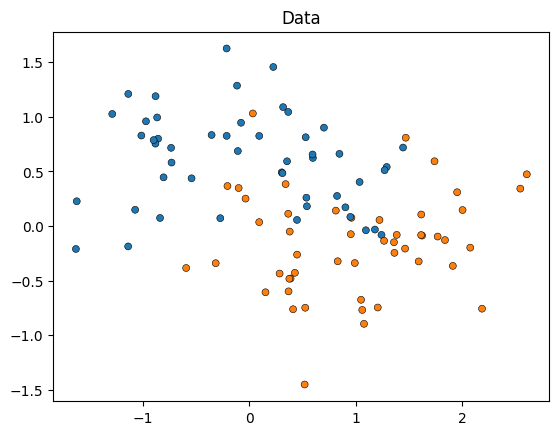

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc",return_train_score=True)
search.fit(X, y)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             return_train_score=True, scoring='roc_auc')

In [3]:
search.best_score_

np.float64(0.944)

In [4]:
search.best_params_

{'kernel': 'rbf'}

In [5]:
search.scorer_

make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

In [6]:
search.cv_results_

{'mean_fit_time': array([0.01144323, 0.00402389, 0.0020483 , 0.00510802]),
 'std_fit_time': array([0.00670686, 0.00287205, 0.00077335, 0.0039477 ]),
 'mean_score_time': array([0.01119528, 0.00584202, 0.00314093, 0.00531797]),
 'std_score_time': array([0.0053156 , 0.00334562, 0.00139434, 0.00261014]),
 'param_kernel': masked_array(data=['linear', 'poly', 'poly', 'rbf'],
              mask=[False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_degree': masked_array(data=[--, 2, 3, --],
              mask=[ True, False, False,  True],
        fill_value=999999),
 'params': [{'kernel': 'linear'},
  {'degree': 2, 'kernel': 'poly'},
  {'degree': 3, 'kernel': 'poly'},
  {'kernel': 'rbf'}],
 'split0_test_score': array([0.97, 0.72, 0.97, 0.92]),
 'split1_test_score': array([0.97, 0.62, 0.95, 0.97]),
 'split2_test_score': array([0.9 , 0.77, 0.88, 0.96]),
 'split3_test_score': array([0.93, 0.53, 0.88, 0.98]),
 'split4_test_score': array([0.89, 0.6 , 0.8

In [7]:
search.best_index_

np.int64(3)

## GridSearch可以直接當成一個模型來使用

In [ ]:
search.predict(X)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

### 預測時用的是下面變數中的模型

In [ ]:
search.best_estimator_.predict(X)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

# 範例

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../content/Iris.csv")
train, test = train_test_split(data, test_size = 0.3, random_state=0)
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train['Species'] # output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test['Species']   #output value of test data

In [9]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"],"C":[0.1,1,10,100,100]},
    {"kernel": ["poly"], "degree": [2, 3],"C":[0.1,1,10,100,1000],"gamma":["scale", "auto"]},
    {"kernel": ["rbf"],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
]

svc = SVC(random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="balanced_accuracy")
search.fit(train_X, train_y)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid=[{'C': [0.1, 1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 100],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']}],
             scoring='balanced_accuracy')

In [10]:
search.best_params_

{'C': 1, 'kernel': 'linear'}

In [11]:
pred = search.predict(test_X)
pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [13]:
from sklearn.metrics import balanced_accuracy_score

print("Valid acc", search.best_score_)
print("Test acc", balanced_accuracy_score(test_y, pred))

Valid acc 0.9694444444444444
Test acc 0.9814814814814815


In [ ]:
search.cv_results_

{'mean_fit_time': array([0.00447092, 0.00358586, 0.0035943 , 0.0025425 , 0.00218887,
        0.00242701, 0.00224519, 0.00200262, 0.00200558, 0.0025548 ,
        0.00220957, 0.00302019, 0.00219746, 0.00182757, 0.00159736,
        0.00220046, 0.00281925, 0.00298381, 0.00300894, 0.00223737,
        0.00238595, 0.00239077, 0.0021884 , 0.00248437, 0.00281935,
        0.00258093, 0.00241876, 0.00209064, 0.00179992, 0.00181293,
        0.00179939, 0.00199647, 0.00197921, 0.0021409 , 0.0016016 ]),
 'std_fit_time': array([1.12486573e-03, 1.03488995e-03, 7.80915933e-04, 4.84655890e-04,
        4.10963686e-04, 4.74942750e-04, 9.77000717e-04, 6.38724354e-04,
        1.47827210e-05, 4.61601954e-04, 3.95634741e-04, 2.18074686e-05,
        4.01522722e-04, 3.97346049e-04, 4.89374200e-04, 3.79177196e-04,
        3.64692322e-04, 3.52798276e-05, 1.58670027e-05, 7.06688521e-04,
        4.70872930e-04, 7.91803581e-04, 3.79124418e-04, 6.05025681e-04,
        4.11461051e-04, 4.81798620e-04, 5.12747034e-04, 6

# RandomizedSearch

RandomizedSearch（隨機搜索）是一種超參數調優方法，它通過隨機選擇超參數空間中的點來進行模型優化，而不是像 GridSearch 那樣進行所有可能組合的穷舉搜索。這種方法的主要優勢在於可以在有限的時間內探索更多的超參數空間，從而找到較為理想的超參數組合。

## 基本概念：
- **超參數（Hyperparameters）**：是模型訓練過程中的設定，通常由使用者指定，而不是從資料中學習到的。例如，對於隨機森林來說，`n_estimators`（樹的數量）和 `max_depth`（最大深度）等是超參數。
- **隨機搜索（Randomized Search）**：隨機從給定的超參數範圍中選擇一組參數配置進行測試。與 GridSearch 的穷舉搜索不同，隨機搜索會隨機選擇超參數的組合，並只進行有限次的實驗。

## RandomizedSearch 的流程：
1. **定義超參數範圍**：使用者為每個超參數指定一個範圍或分佈（例如，對於連續型超參數可以設置一個範圍，對於離散型超參數可以設置一個選項列表）。
2. **隨機選擇參數組合**：從這些範圍或分佈中隨機選擇一組超參數配置，並訓練模型。
3. **評估每個模型**：對每組隨機選擇的超參數組合進行模型訓練與評估，通常使用交叉驗證來評估模型表現。
4. **選擇最佳參數**：根據模型的評估結果選擇最佳的超參數組合。

## 優點：
- **計算效率高**：與 GridSearch 相比，隨機搜索的計算量較小，因為它只需要評估少量的隨機參數組合。這對於超參數空間很大的情況特別有用。
- **探索範圍廣泛**：隨機搜索能夠探索到 GridSearch 可能漏掉的超參數組合，尤其是在參數空間比較大時，隨機搜索能夠更高效地搜索到較為理想的組合。
- **快速得到結果**：即使進行較少的實驗，隨機搜索也有可能找到接近最佳的超參數。

## 缺點：
- **無法保證找到最佳解**：由於隨機搜索並不是穷舉所有可能，它可能錯過最佳的超參數組合。
- **需要多次運行**：為了提高找到最佳參數組合的機率，隨機搜索通常需要進行多次實驗，但相對於 GridSearch，它的計算時間會短很多。

## 範例：
假設我們使用隨機森林（Random Forest）模型並希望調整 `n_estimators` 和 `max_depth` 這兩個超參數的最佳組合。隨機搜索會隨機選擇不同範圍內的參數組合來進行實驗。

例如，`n_estimators` 可以從 [10, 50, 100, 200] 隨機選擇，`max_depth` 可以從 [5, 10, 15, 20] 中隨機選擇。

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"],"C":[0.1,1,10,100,100]},
    {"kernel": ["poly"], "degree": [2, 3],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
    {"kernel": ["rbf"],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
]

svc = SVC(random_state=0)

search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, scoring="balanced_accuracy")
search.fit(train_X, train_y)

RandomizedSearchCV(estimator=SVC(random_state=0),
                   param_distributions=[{'C': [0.1, 1, 10, 100, 100],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10, 100, 100],
                                         'degree': [2, 3],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['poly']},
                                        {'C': [0.1, 1, 10, 100, 100],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf']}],
                   scoring='balanced_accuracy')

In [ ]:
search.best_score_

np.float64(0.9694444444444444)

In [ ]:
search.best_params_

{'kernel': 'linear', 'C': 1}

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.00420747, 0.00339274, 0.00280151, 0.00206194, 0.00198908,
        0.00222979, 0.00144491, 0.00199866, 0.002282  , 0.00219588]),
 'std_fit_time': array([7.46118403e-04, 4.89234236e-04, 3.95600315e-04, 1.27320397e-04,
        2.33691076e-05, 4.47514699e-04, 5.99114905e-04, 7.29420592e-06,
        3.91907340e-04, 3.98259533e-04]),
 'mean_score_time': array([0.00379524, 0.00300961, 0.00259547, 0.00204339, 0.00221944,
        0.0016108 , 0.00119424, 0.00138025, 0.0020483 , 0.00199523]),
 'std_score_time': array([7.47247913e-04, 8.75018922e-06, 4.87142671e-04, 4.97098106e-05,
        3.84015085e-04, 4.53140346e-04, 2.75219610e-04, 4.67228845e-04,
        6.94747649e-05, 4.89513697e-05]),
 'param_kernel': masked_array(data=['poly', 'rbf', 'poly', 'linear', 'rbf', 'rbf',
                    'linear', 'poly', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=np.str_('?'),

In [ ]:
pred = search.predict(test_X)
pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print("Train acc", search.best_score_)
print("Test acc", balanced_accuracy_score(test_y, pred))

Train acc 0.9694444444444444
Test acc 0.9814814814814815
